##BREAST CANCER PREDICTION

**Importing the libraries**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

**Importing the dataset**

In [41]:
df = pd.read_csv('/content/breast_cancer.csv')

**View first five data**

In [42]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


**View last five data**

In [43]:
df.tail()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1
698,897471,4,8,8,5,4,5,10,4,1,1


**Description of the dataset**

In [44]:
df.describe()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleoli,mitoses,classes
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


**Information of the dataset**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chrom             699 non-null    int64 
 8   norm_nucleoli           699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  classes                 699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


**Shape of the dataset**

In [46]:
df.shape

(699, 11)

**Handling missing values**

In [47]:
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

<ipython-input-47-7ccb4ab8ab1d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


**Assigning x and y values**

In [48]:
X = np.array(df.drop(['classes'], 1))
y = np.array(df['classes'])

<ipython-input-48-38f0fafb7e63>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['classes'], 1))


**Splitting the dataset into the Training set and Test set**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

**Scaling**

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Principal Component Analysis**

In [52]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

**Fitting KNN to the Training set**

In [53]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 21))}
scoring = {
 'Accuracy': 'accuracy',
 'Precision': make_scorer(precision_score, average='weighted'),
 'Recall': make_scorer(recall_score, average='weighted'),
 'F1 Score': make_scorer(f1_score, average='weighted'),
 'ROC AUC': make_scorer(roc_auc_score, average='weighted')
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scoring, refit='Accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


**Fitting SVM to the Training set**

In [54]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate models
evaluation_metrics = {
 'Accuracy': accuracy_score,
 'Precision': precision_score,
 'Recall': recall_score,
 'F1 Score': f1_score,
 'ROC AUC': roc_auc_score
}

for metric_name, metric_func in evaluation_metrics.items():
 knn_score = metric_func(y_test, y_pred_knn)
 svm_score = metric_func(y_test, y_pred_svm)
 print(f'{metric_name} (KNN): {knn_score}')
 print(f'{metric_name} (SVM): {svm_score}')


Accuracy (KNN): 0.9714285714285714
Accuracy (SVM): 0.9591836734693877
Precision (KNN): 0.9512195121951219
Precision (SVM): 0.9493670886075949
Recall (KNN): 0.9629629629629629
Recall (SVM): 0.9259259259259259
F1 Score (KNN): 0.9570552147239264
F1 Score (SVM): 0.9375000000000001
ROC AUC (KNN): 0.9692863595302619
ROC AUC (SVM): 0.9507678410117435


**Visualizing the results**

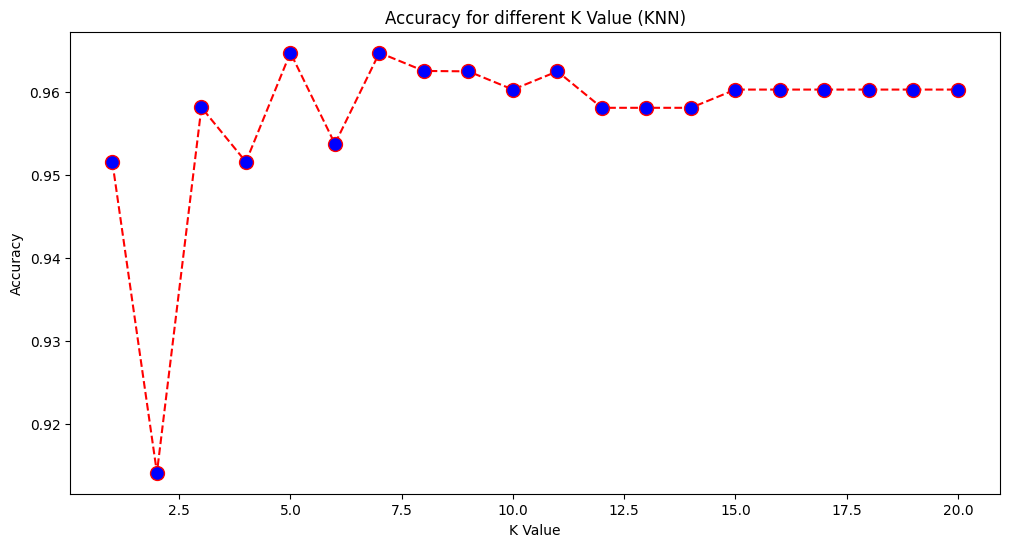

In [55]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), grid_search.cv_results_['mean_test_Accuracy'], color='red', linestyle='dashed', marker='o',
 markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different K Value (KNN)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()